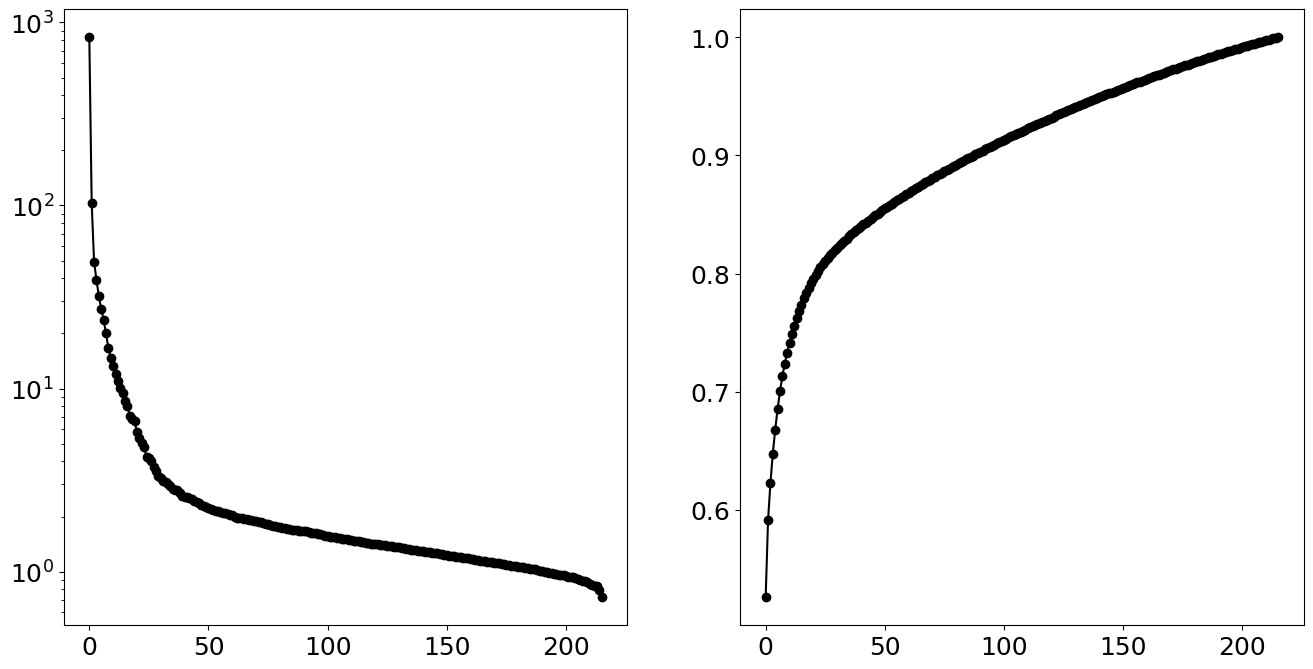

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})


obs = np.loadtxt(os.path.join('..','DATA','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('..','DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=0)


#print("Singular values:", S )
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

In [3]:
# Check whether data is already mean-centered
feature_means = np.mean(obs, axis=0)
print("Max |feature mean|:", np.max(np.abs(feature_means)))
print("Mean of feature means:", np.mean(feature_means))

Max |feature mean|: 30.031740740740734
Mean of feature means: 0.14639838293801732


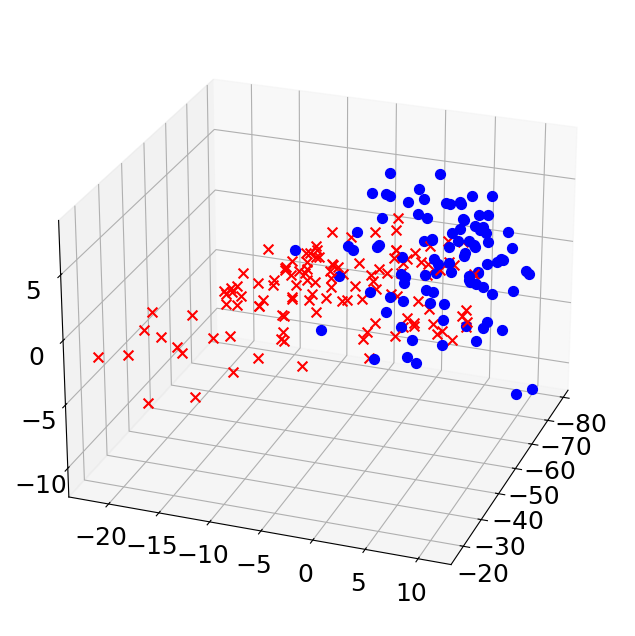

In [4]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

n = number of observations (patients) - 416
m = number of genetic markers - 4000

PCA = Identify principal components and their loading values.

Once you have this, then

- given an observation, you can identify the observation's projectons on PCA1, PCA2 ...

In [5]:
print( "PC1 = ", VT[0,:])

PC1 =  [-0.00060164 -0.0005753  -0.00052043 ... -0.00048118 -0.00046371
 -0.00046603]


In [6]:
print("Maximum loading value in PC1 =", np.max(np.abs(VT[0,:])))
print("Index of maximum loading in PC1 =", np.argmax(np.abs(VT[0,:])))

Maximum loading value in PC1 = 0.5477625039089463
Index of maximum loading in PC1 = 2662


In [7]:
# Get the indices of the top 5 genes with highest absolute loading values in PC1
top5_indices = np.argsort(np.abs(VT[0,:]))[-5:][::-1]
print("Top 5 gene indices that contribute to PC1:")
print(top5_indices)
print("\nTheir loading values:")
print(VT[0, top5_indices])

Top 5 gene indices that contribute to PC1:
[2662 2663 2664 2661 2831]

Their loading values:
[-0.5477625  -0.54321742 -0.32373948 -0.26538366 -0.14133392]


In [8]:
# Sum of squared coefficients (loadings) in PC1
# This should equal 1 since VT is orthonormal
pc1_squared_sum = np.sum(VT[0,:]**2)
print("Sum of squared coefficients in PC1:", pc1_squared_sum)

Sum of squared coefficients in PC1: 0.999999999999999


This reveals important patterns:

1. Gene clustering effect:
Genes 2662, 2663, 2664, and 2661 are consecutive indices, suggesting they may be:

In the same chromosomal region
Part of a gene family or co-regulated genes
Sharing similar biological functions related to ovarian cancer
2. Negative loadings mean:
These genes are all negatively weighted in PC1. When projecting a patient:

High expression of these genes → more negative PC1 score
Low expression of these genes → more positive PC1 score
Looking at your 3D plot from the notebook, if cancer patients cluster on one side and non-cancer on the other, this tells you the direction:

If cancer patients have negative PC1 scores → these genes are upregulated in cancer
If cancer patients have positive PC1 scores → these genes are downregulated in cancer
3. Dominant contribution:
These 5 genes together have very strong influence:

The loadings do NOT sum to 1. Instead, the sum of the SQUARES of all loadings in a principal component equals 1:


This is because each row of VT is a unit vector.

Correct interpretation:

For gene 2662 with loading = -0.548:

Its squared loading = 0.548² = 0.300 (approximately)
This means gene 2662 accounts for ~30% of the unit variance of PC1
For the top genes:

Gene 2662: (-0.548)² = 0.300 → 30.0%
Gene 2663: (-0.543)² = 0.295 → 29.5%
Gene 2664: (-0.324)² = 0.105 → 10.5%
Gene 2661: (-0.265)² = 0.070 → 7.0%
Gene 2831: (-0.141)² = 0.020 → 2.0%
These 5 genes together account for ~79% of PC1's total unit variance (0.300 + 0.295 + 0.105 + 0.070 + 0.020 ≈ 0.79).

What PCA discovers:

New orthogonal coordinate system: The rows of VT (or columns of V) are the principal component directions in the original feature space. These form an orthogonal basis.

Rotation to standard basis: V (or VT) is the rotation matrix that transforms from the standard basis (original features) to the principal component basis.

Loadings: Each row of VT shows how the original features combine to form that principal component. These are the "loadings" — they tell you which genes/features contribute most to each PC.

Projections for prediction:

In [9]:
x = VT[0,:] @ obs[j,:].T  # Project patient j onto PC1

This projects the patient's feature vector onto the principal components, giving you scores that can be used for classification/prediction.

Therefore, PCA discovers orthogonal directions (in feature space) that capture maximum variance, and simultaneously provides the rotation matrix (V/VT) that maps between the original features and these new coordinates. The loadings reveal which original features are important for each component.

PC1 Analysis:
Cancer patients - Mean: -49.4969, Std: 12.2455
Control patients - Mean: -62.1318, Std: 8.1973

PC2 Analysis:
Cancer patients - Mean: -5.3335, Std: 6.2669
Control patients - Mean: 3.5545, Std: 3.5832

PC3 Analysis:
Cancer patients - Mean: -0.5309, Std: 2.8715
Control patients - Mean: 0.7716, Std: 3.7693



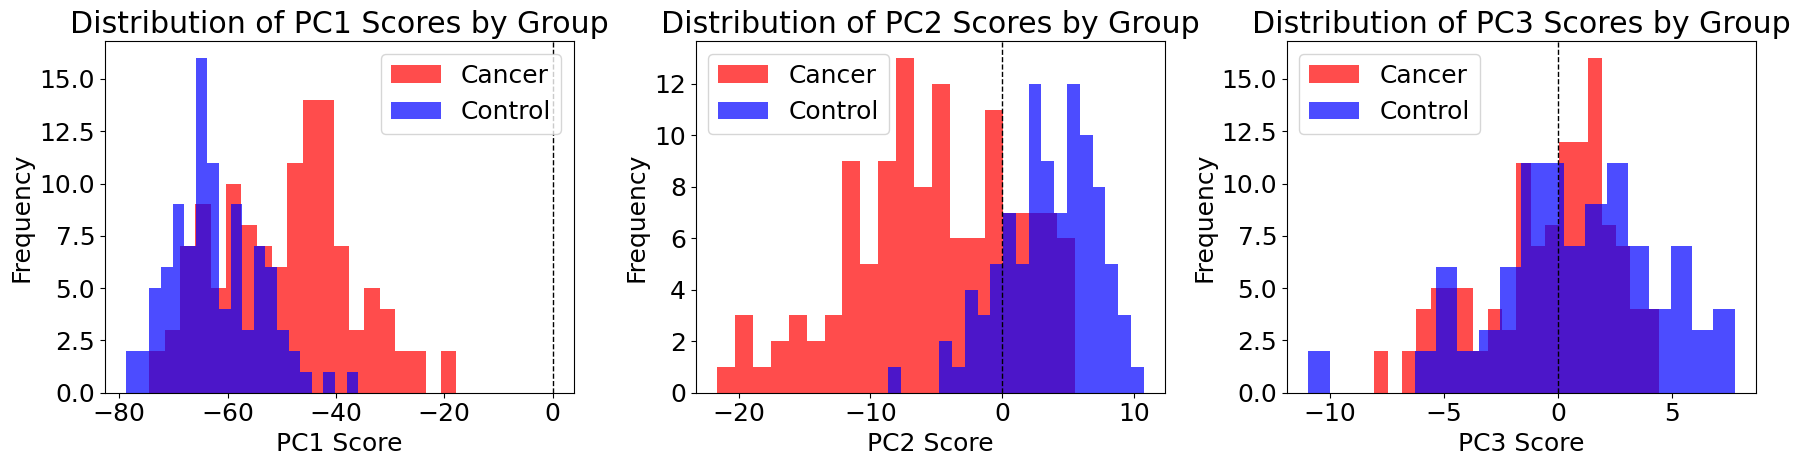

In [10]:
# Cancer patients vs Control patients analysis
# Cancer patients have a strong PC1 signature, while Control patients do not.
# The below code calculates the PC1 scores for all patients and compares the distributions.

# Calculate PC1 scores for all patients

# Loop through PC1, PC2, PC3 and create comparative analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, pc_idx in enumerate([0, 1, 2]):
    # Calculate PC scores for all patients
    pc_scores = obs @ VT[pc_idx, :].T
    
    # Separate scores by group
    cancer_scores = []
    control_scores = []
    
    for j in range(obs.shape[0]):
        if grp[j] == 'Cancer':
            cancer_scores.append(pc_scores[j])
        else:
            control_scores.append(pc_scores[j])
    
    cancer_scores = np.array(cancer_scores)
    control_scores = np.array(control_scores)
    
    # Print statistics
    print(f"PC{pc_idx+1} Analysis:")
    print(f"Cancer patients - Mean: {np.mean(cancer_scores):.4f}, Std: {np.std(cancer_scores):.4f}")
    print(f"Control patients - Mean: {np.mean(control_scores):.4f}, Std: {np.std(control_scores):.4f}")
    print()
    
    # Plot histogram
    axes[i].hist(cancer_scores, bins=20, alpha=0.7, label='Cancer', color='red')
    axes[i].hist(control_scores, bins=20, alpha=0.7, label='Control', color='blue')
    axes[i].set_xlabel(f'PC{pc_idx+1} Score')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of PC{pc_idx+1} Scores by Group')
    axes[i].legend()
    axes[i].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

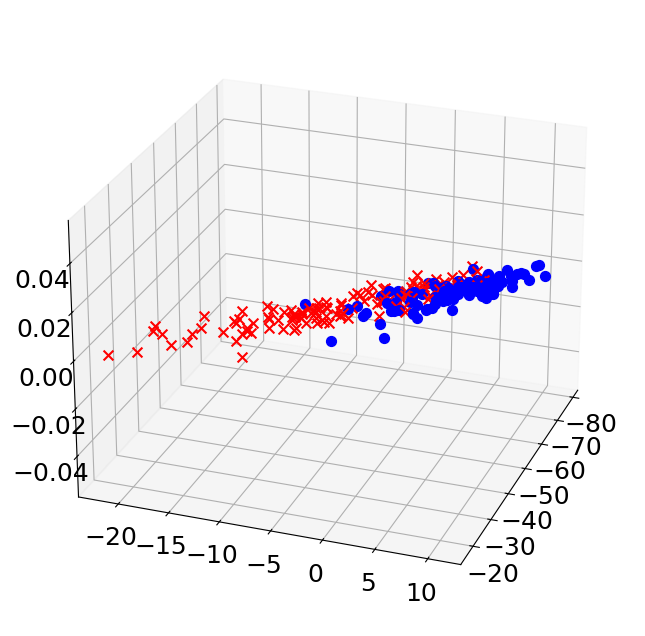

In [11]:
# The above shows that PC1 and PC2 are important in separating Cancer vs Control patients, while PC3 is not.

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,0,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,0,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

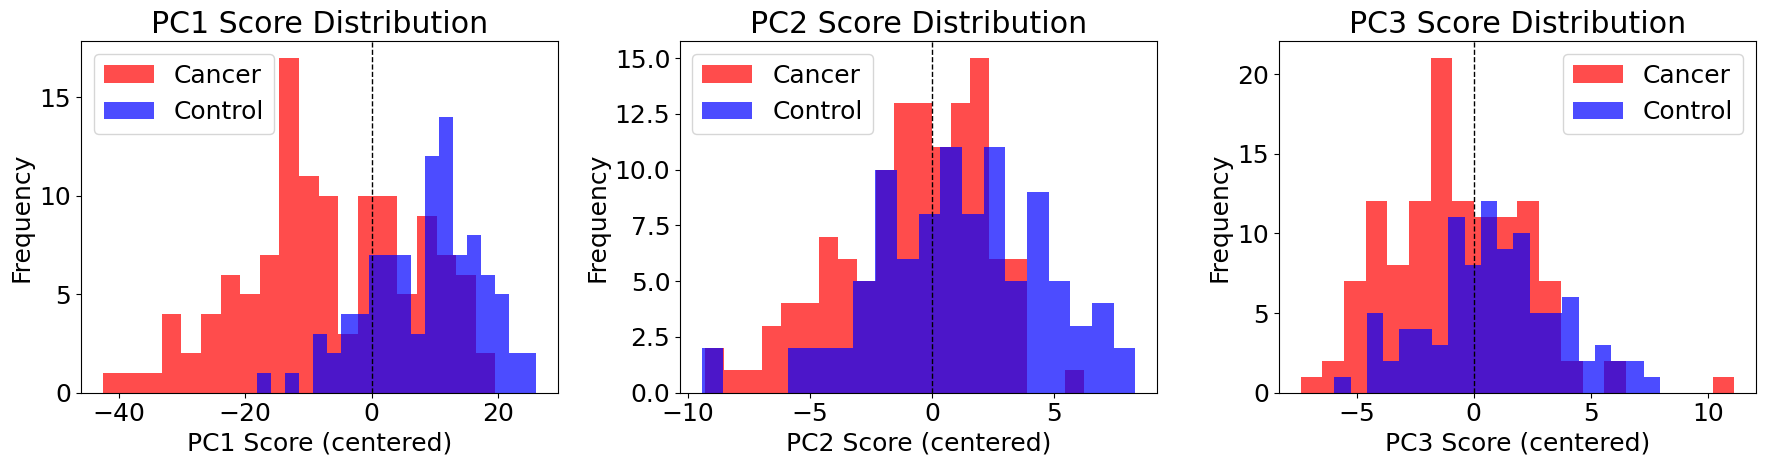

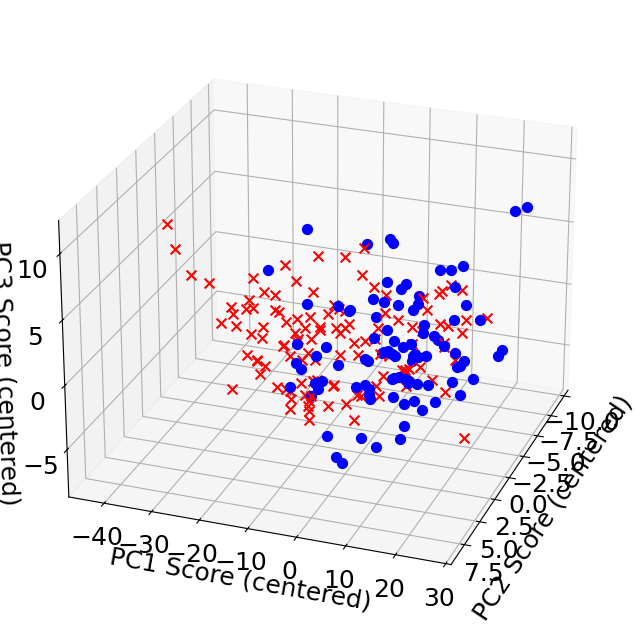

In [12]:
# Mean-center features, recompute PCA, and replot projections
feature_means = np.mean(obs, axis=0, keepdims=True)
obs_centered = obs - feature_means

U_c, S_c, VT_c = np.linalg.svd(obs_centered, full_matrices=0)

# Distributions of centered PC scores by group (PC1–PC3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, pc_idx in enumerate([0, 1, 2]):
    pc_scores = obs_centered @ VT_c[pc_idx, :].T
    grp_arr = np.array(grp[:obs_centered.shape[0]])
    cancer_scores = pc_scores[grp_arr == 'Cancer']
    control_scores = pc_scores[grp_arr != 'Cancer']

    axes[i].hist(cancer_scores, bins=20, alpha=0.7, label='Cancer', color='red')
    axes[i].hist(control_scores, bins=20, alpha=0.7, label='Control', color='blue')
    axes[i].set_xlabel(f'PC{pc_idx+1} Score (centered)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'PC{pc_idx+1} Score Distribution')
    axes[i].legend()
    axes[i].axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# 3D projection (centered PC1–PC3)
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
for j in range(obs_centered.shape[0]):
    x = VT_c[0, :] @ obs_centered[j, :].T
    y = VT_c[1, :] @ obs_centered[j, :].T
    z = VT_c[2, :] @ obs_centered[j, :].T
    if j == 0:
        ax.set_xlabel('PC2 Score (centered)')
        ax.set_ylabel('PC1 Score (centered)')
        ax.set_zlabel('PC3 Score (centered)')
        # Put PC1 on x-axis and PC2 on y-axis for clearer separation
    if grp[j] == 'Cancer':
        ax.scatter(y, x, z, marker='x', color='r', s=50)
    else:
        ax.scatter(y, x, z, marker='o', color='b', s=50)

ax.view_init(25, 20)
plt.show()

In [13]:
centered_means = np.mean(obs_centered, axis=0)
print("Max |feature mean| (centered):", np.max(np.abs(centered_means)))
print("Mean of feature means (centered):", np.mean(centered_means))


Max |feature mean| (centered): 6.447517417082391e-15
Mean of feature means (centered): 3.661764339534534e-18


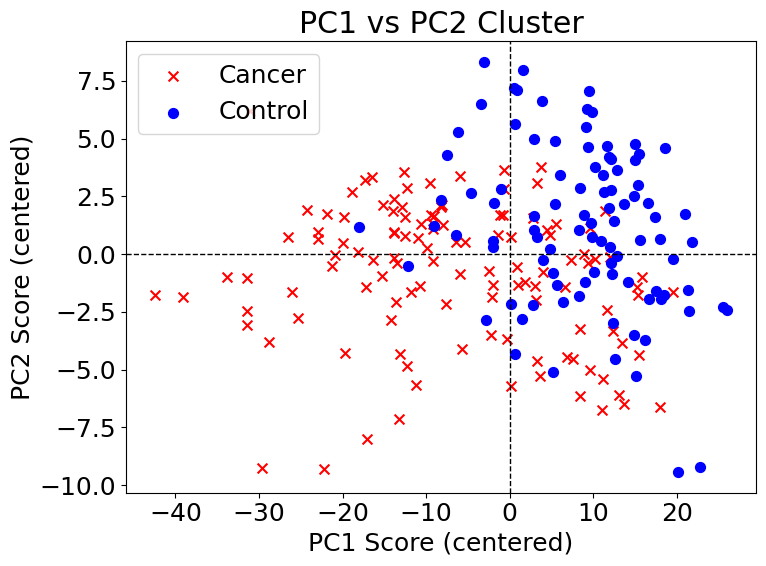

In [14]:
# 2D scatter of PC1 vs PC2 (centered)
pc1_scores = obs_centered @ VT_c[0, :].T
pc2_scores = obs_centered @ VT_c[1, :].T
grp_arr = np.array(grp[:obs_centered.shape[0]])

plt.figure(figsize=(8, 6))
plt.scatter(pc1_scores[grp_arr == 'Cancer'], pc2_scores[grp_arr == 'Cancer'],
            marker='x', color='red', s=50, label='Cancer')
plt.scatter(pc1_scores[grp_arr != 'Cancer'], pc2_scores[grp_arr != 'Cancer'],
            marker='o', color='blue', s=50, label='Control')

plt.xlabel('PC1 Score (centered)')
plt.ylabel('PC2 Score (centered)')
plt.title('PC1 vs PC2 Cluster')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()

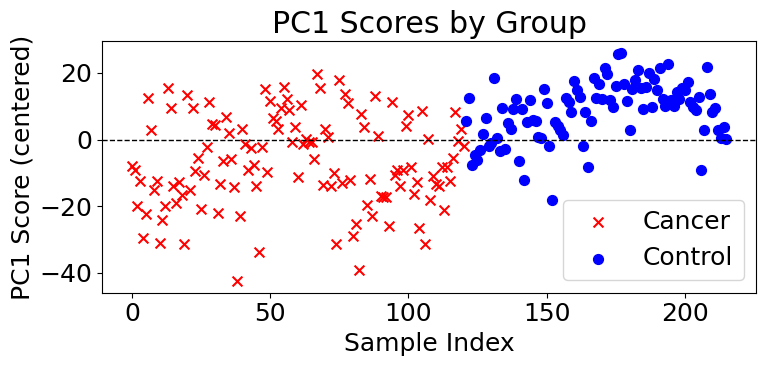

In [15]:
# Scatter plot of PC1 scores by group
plt.figure(figsize=(8, 4))
plt.scatter(np.arange(len(pc1_scores))[grp_arr == 'Cancer'], pc1_scores[grp_arr == 'Cancer'],
            marker='x', color='red', s=50, label='Cancer')
plt.scatter(np.arange(len(pc1_scores))[grp_arr != 'Cancer'], pc1_scores[grp_arr != 'Cancer'],
            marker='o', color='blue', s=50, label='Control')

plt.xlabel('Sample Index')
plt.ylabel('PC1 Score (centered)')
plt.title('PC1 Scores by Group')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()

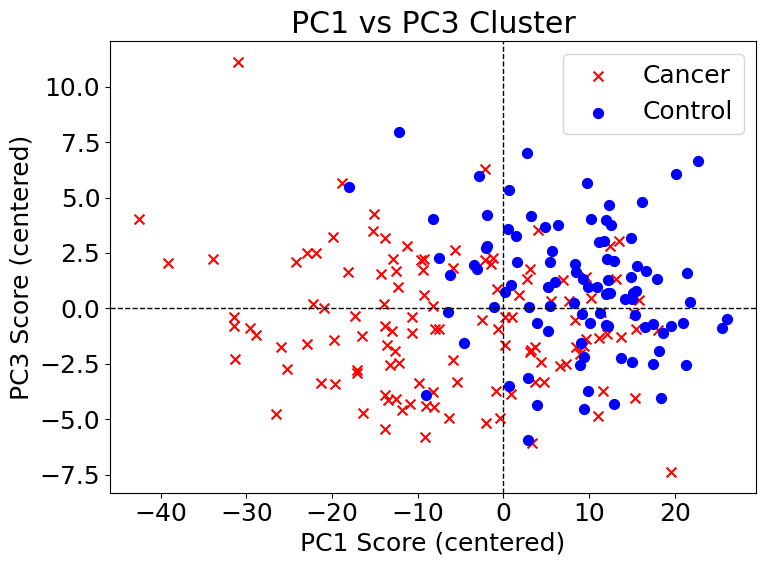

In [16]:
pc3_scores = obs_centered @ VT_c[2, :].T

plt.figure(figsize=(8, 6))
plt.scatter(pc1_scores[grp_arr == 'Cancer'], pc3_scores[grp_arr == 'Cancer'],
            marker='x', color='red', s=50, label='Cancer')
plt.scatter(pc1_scores[grp_arr != 'Cancer'], pc3_scores[grp_arr != 'Cancer'],
            marker='o', color='blue', s=50, label='Control')

plt.xlabel('PC1 Score (centered)')
plt.ylabel('PC3 Score (centered)')
plt.title('PC1 vs PC3 Cluster')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()